<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case (primera letra mayus al inicio de cada palabra) y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## solucion

In [157]:
import pandas as pd
import matplotlib.pylab as plt

In [158]:
path = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv'
df=pd.read_csv(f"{path}")
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


In [159]:
#encontremos informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   time                5000 non-null   object 
 2   open                5000 non-null   float64
 3   high                5000 non-null   float64
 4   low                 5000 non-null   float64
 5   close               5000 non-null   float64
 6   tick_volume         5000 non-null   int64  
 7   spread              5000 non-null   int64  
 8   real_volume         5000 non-null   int64  
 9   MeanCloseOpen       5000 non-null   float64
 10  Diff_Close          5000 non-null   float64
 11  Diff_Open           5000 non-null   float64
 12  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 507.9+ KB


In [160]:
#¿cuantos null o nan tiene el dataframe
df.isna().sum()

,0
Unnamed: 0,0
time,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0


In [161]:
#su tabla de count, mean, std, min... lo dice todo
df.describe()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,1443.520003,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.000000,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1249.750000,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,2499.500000,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,3749.250000,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,4999.000000,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


In [162]:
type(df.time[0])

str

In [163]:
df.index = pd.to_datetime(df.time)
print(type(df.index[0]))
df

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,,
2022-07-25 13:00:00,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


In [164]:
#"tumbamos la columna Unnamed"
df = df.drop(columns=["Unnamed: 0","time"])
df

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


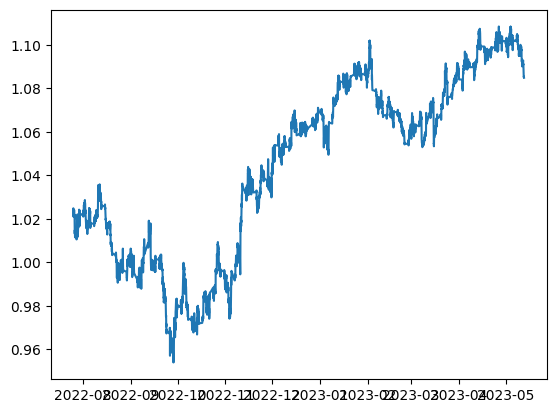

In [165]:
plt.plot(df["close"])

In [166]:
df.index.month

Index([7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       ...
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype='int32', name='time', length=5000)

array([[<Axes: title={'center': 'close'}>]], dtype=object)

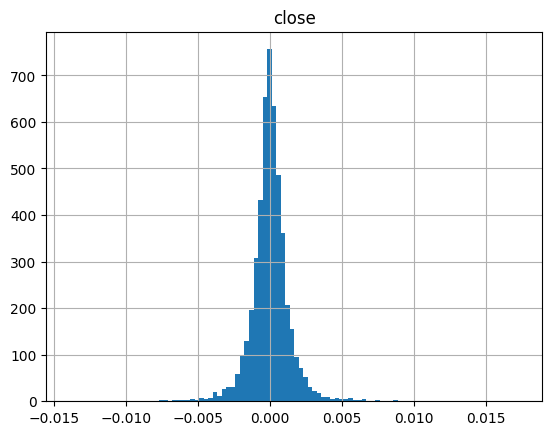

In [167]:
df1 = df[["close"]]
df1.columns=["close"]
df1.diff(1)[1:].hist(bins=100)

In [168]:
df1[1:]

,close
time,
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
2022-07-25 18:00:00,1.02099
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


In [169]:
!pip install fitter

(1.4022316423526322,
 0.8427564225370033,
 0.9520495452002334,
 0.15645045479976663)

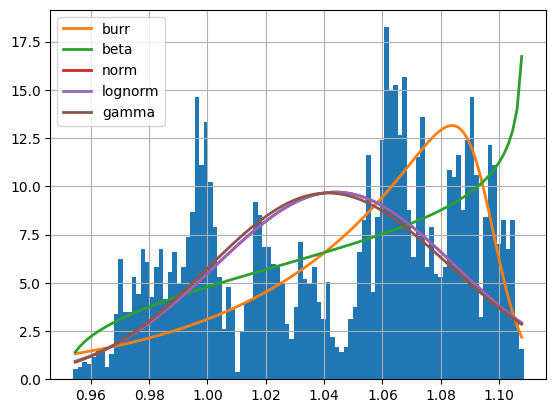

In [170]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df1,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

In [171]:
#trabajemos solo con los datos del 2023
año_2023 = df1[df1.index.year == 2023]
año_2023

,close
time,
2023-01-02 00:00:00,1.06796
2023-01-02 01:00:00,1.06965
2023-01-02 02:00:00,1.07058
2023-01-02 03:00:00,1.06896
2023-01-02 04:00:00,1.06880
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


In [172]:
#agrupamos por dias, semanas, meses...
mes = año_2023.groupby(pd.Grouper(freq='1M'))
mes

<ipython-input-172-3702d3c64729>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mes = año_2023.groupby(pd.Grouper(freq='1M'))


In [173]:
año_2023.groupby(pd.Grouper(freq='1M')).mean()

<ipython-input-173-f8dfb43f14ca>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  año_2023.groupby(pd.Grouper(freq='1M')).mean()


,close
time,
2023-01-31,1.077463
2023-02-28,1.071167
2023-03-31,1.070874
2023-04-30,1.096051
2023-05-31,1.098980


,0
time,
2023-01-31,"[[Axes(0.125,0.11;0.775x0.77)]]"
2023-02-28,"[[Axes(0.125,0.11;0.775x0.77)]]"
2023-03-31,"[[Axes(0.125,0.11;0.775x0.77)]]"
2023-04-30,"[[Axes(0.125,0.11;0.775x0.77)]]"
2023-05-31,"[[Axes(0.125,0.11;0.775x0.77)]]"


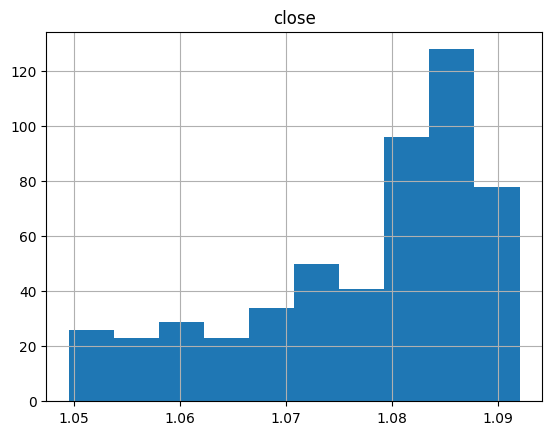

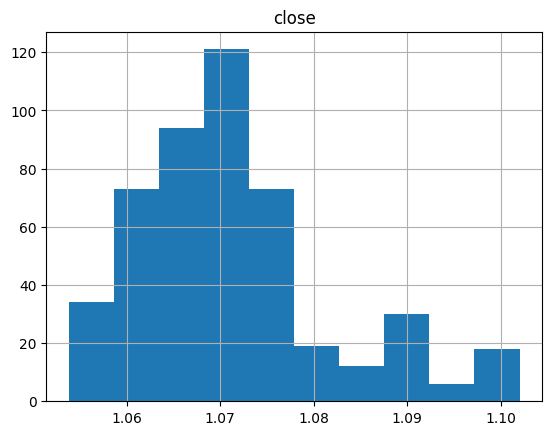

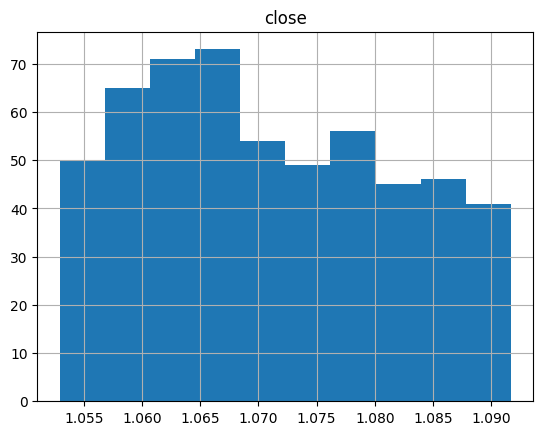

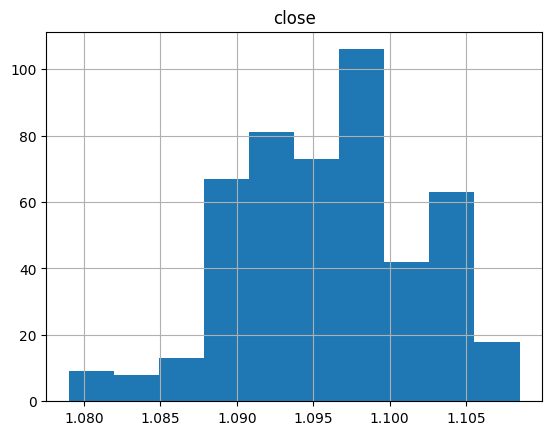

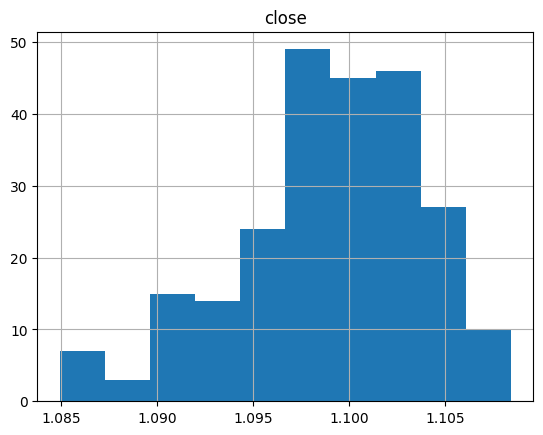

In [174]:
#Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el metodo groupby. Notetese que si no realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

mes.hist(bins=10)

In [175]:
for name, group in mes:
  print(name, group)

2023-01-31 00:00:00                        close
time                        
2023-01-02 00:00:00  1.06796
2023-01-02 01:00:00  1.06965
2023-01-02 02:00:00  1.07058
2023-01-02 03:00:00  1.06896
2023-01-02 04:00:00  1.06880
...                      ...
2023-01-31 19:00:00  1.08651
2023-01-31 20:00:00  1.08724
2023-01-31 21:00:00  1.08641
2023-01-31 22:00:00  1.08724
2023-01-31 23:00:00  1.08618

[528 rows x 1 columns]
2023-02-28 00:00:00                        close
time                        
2023-02-01 00:00:00  1.08598
2023-02-01 01:00:00  1.08607
2023-02-01 02:00:00  1.08624
2023-02-01 03:00:00  1.08573
2023-02-01 04:00:00  1.08540
...                      ...
2023-02-28 19:00:00  1.06055
2023-02-28 20:00:00  1.05913
2023-02-28 21:00:00  1.05835
2023-02-28 22:00:00  1.05760
2023-02-28 23:00:00  1.05741

[480 rows x 1 columns]
2023-03-31 00:00:00                        close
time                        
2023-03-01 00:00:00  1.05767
2023-03-01 01:00:00  1.05769
2023-03-01 02:00:00  1

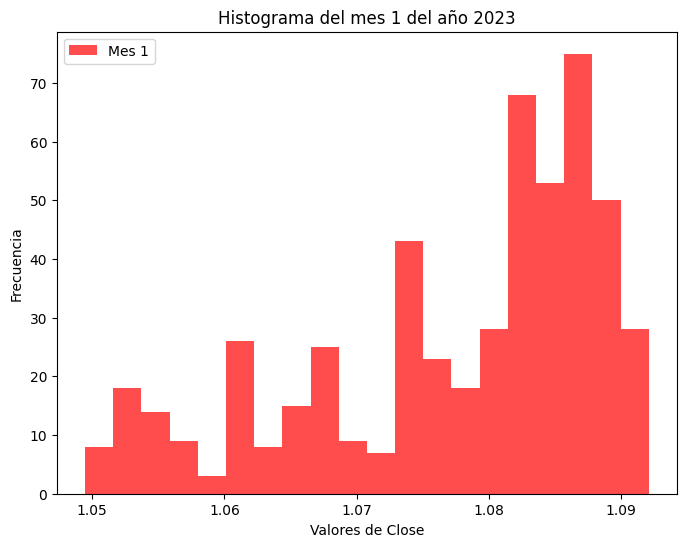

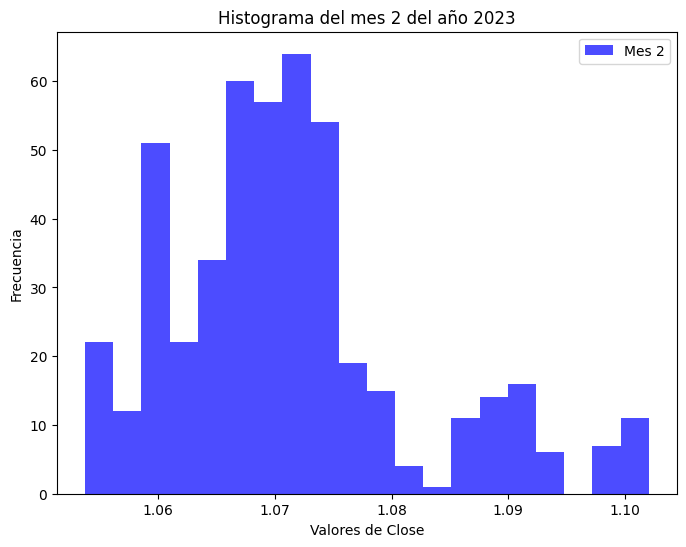

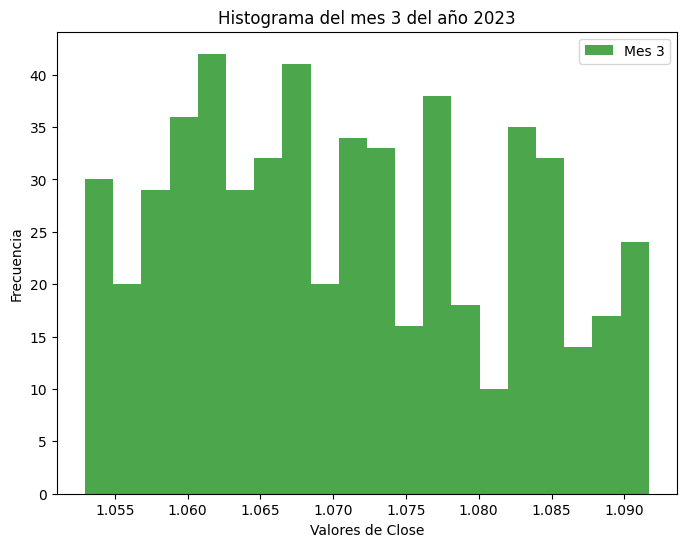

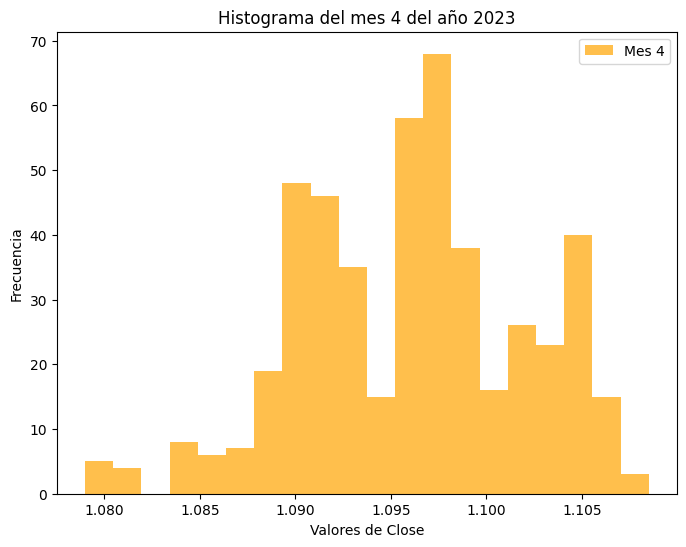

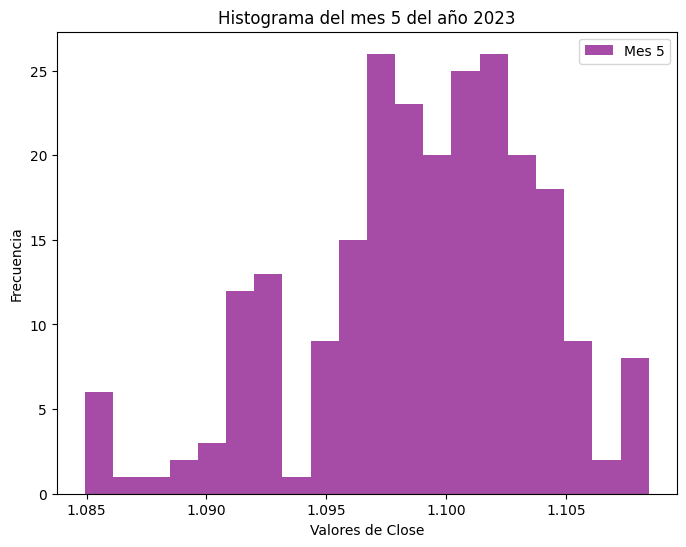

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya has creado un DataFrame df1 con una columna 'close'

# Asegúrate de que el índice sea de tipo datetime
df1.index = pd.to_datetime(df1.index)

# Filtrar los datos del año 2023
año_2023 = df1[df1.index.year == 2023]

# Agrupar por mes
mes = año_2023.groupby(año_2023.index.month)

# Lista de colores para los 12 meses
colores = ['red', 'blue', 'green', 'orange', 'purple',
           'brown', 'pink', 'gray', 'cyan', 'magenta',
           'yellow', 'lime']

# Crear un histograma para cada grupo
for name, group in mes:
    plt.figure(figsize=(8, 6))
    group['close'].hist(bins=20, color=colores[name - 1], alpha=0.7, label=f'Mes {name}')  # Histograma
    plt.title(f'Histograma del mes {name} del año 2023')
    plt.xlabel('Valores de Close')
    plt.ylabel('Frecuencia')
    plt.legend()  # Agrega la leyenda
    plt.grid()  # Opcional: agrega una cuadrícula
    plt.show()


Para el dataset realizar lo siguiente:

1. Leer los datos desde la página web

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

4. Contabilizar la cantidad de null or nan en el dataframe, si hay null, ¿que valor se puede tomar para reemplazar los datos?

5. Encontrar los valores  diferentes en el target, mostrar que es B y M. Emplear el metodo unique.

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

## 1. Leer los datos desde la página web

In [177]:
import pandas as pd
import matplotlib.pylab as plt

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
path = '/content/drive/MyDrive/Aprendizaje_Estadistico/wdbc.data'
data = pd.read_csv(f"{path}", header=0)  # Cambia 'delimiter' si es necesario
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [180]:
data = pd.read_csv(path, sep=",", header=None)  # Cambia header si el archivo no tiene encabezado
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [181]:
data.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')

In [182]:
pip install ucimlrepo

In [183]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

## 2. Renombrar las columnas en PascalCase Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

In [184]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [185]:
X.columns = X.columns.str.replace('_', ' ').str.title().str.replace(' ', '')
X

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe

In [186]:
X.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [187]:
X.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [188]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

## 4. Contabilizar la cantidad de null or nan en el dataframe, si hay null, ¿que valor se puede tomar para reemplazar los datos?

In [189]:
X.isna().sum()

,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0
FractalDimension1,0


## 5. Encontrar los valores diferentes en el target, mostrar que es B y M. Emplear el metodo unique.


In [190]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [191]:
# Encontrar los valores únicos en la columna 'Diagnosis' (target)
ValoresUnicos = y['Diagnosis'].unique()
ValoresUnicos

array(['M', 'B'], dtype=object)

## 6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```

In [192]:
import seaborn as sns
sns.countplot?

In [193]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [194]:
maligno = y[y['Diagnosis' ] == 'M']
maligno.count()

,0
Diagnosis,212


In [195]:
benigno = y[y['Diagnosis']== 'B']
benigno.count()

,0
Diagnosis,357


In [196]:
total = len (maligno+benigno)
total

569

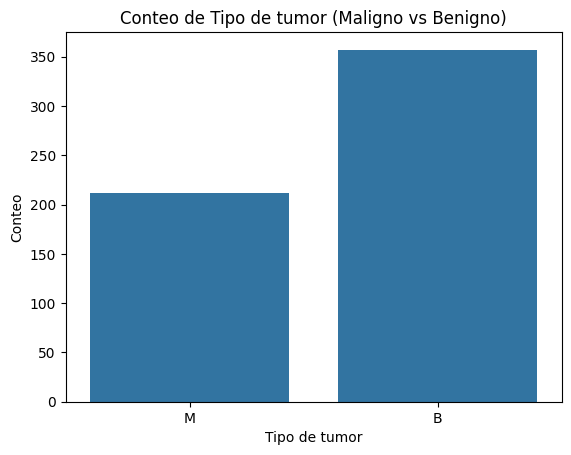

In [197]:
# Usar Seaborn para realizar un conteo de las transacciones 'compra' y 'venta'
sns.countplot(x='Diagnosis', data=y)

# Añadir etiquetas y título al gráfico
plt.title("Conteo de Tipo de tumor (Maligno vs Benigno)")
plt.xlabel("Tipo de tumor")
plt.ylabel("Conteo")

# Mostrar el gráfico
plt.show()

## 7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.



In [198]:
# Crear una nueva columna DiagnosisNumeric, donde 'B' será 0 y 'M' será 1
y['DiagnosisNumeric'] = y['Diagnosis'].map({'B': 0, 'M': 1})
y

<ipython-input-198-f2dd1a7a704c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['DiagnosisNumeric'] = y['Diagnosis'].map({'B': 0, 'M': 1})


,Diagnosis,DiagnosisNumeric
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


## 8. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

In [199]:
# Seleccionamos solo las columnas numéricas para normalizar, exceptuando ID y Diagnosis
cols = X.iloc[:, 2:-1]  # Ignoramos la columna ID, Diagnosis y DiagnosisNumeric

# Normalizamos cada columna: (x - mean(x)) / std(x))
cols_normalizadas = (cols - cols.mean()) / cols.std()
cols_normalizadas

,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,Radius2,Texture2,...,FractalDimension2,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3
0,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,...,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204
1,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,...,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675
2,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,...,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242
3,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,...,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726
4,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,...,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,2.779634,0.070963,...,0.167832,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963
565,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,1.299356,2.258951,...,-0.490124,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387
566,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,0.184730,-0.257145,...,0.036694,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578
567,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,1.156917,0.685485,...,0.903262,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396


## 9. Agrupar características similares y calcular su promedio. Para las siguientes características:

['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]


In [200]:
cols_normalizadas

,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,Radius2,Texture2,...,FractalDimension2,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3
0,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,...,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204
1,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,...,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675
2,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,...,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242
3,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,...,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726
4,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,...,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,2.779634,0.070963,...,0.167832,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963
565,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,1.299356,2.258951,...,-0.490124,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387
566,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,0.184730,-0.257145,...,0.036694,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578
567,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,1.156917,0.685485,...,0.903262,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396


In [201]:
type(cols_normalizadas)

pandas.core.frame.DataFrame

In [202]:
#método (startswitch)
# Filtrar columnas que comienzan con 'Radius' usando startswith
radius_cols_startswith = [col for col in cols_normalizadas.columns if col.startswith('Radius')]

# Calcular el promedio
cols_normalizadas['MeanRadius'] = cols_normalizadas[radius_cols_startswith].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['MeanRadius'] ])

     MeanRadius
0      2.186288
1      1.151578
2      1.369068
3      0.022435
4      1.283430
..          ...
564    2.339574
565    1.417363
566    0.372799
567    1.558216
568   -0.739935

[569 rows x 1 columns]


In [203]:
#método con match
#patron para Radio
import re
# Expresión regular para identificar las columnas que comienzan con 'Radius'
pattern = r'^Radius'

# Filtrar columnas que coinciden con el patrón
radius_cols = [col for col in cols_normalizadas.columns if re.match(pattern, col)]

# Calcular el promedio de las columnas que coinciden con el patrón 'Radius'
cols_normalizadas['MeanRadius'] = cols_normalizadas[radius_cols].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['MeanRadius'] + radius_cols])

     MeanRadius   Radius2   Radius3
0      2.186288  2.487545  1.885031
1      1.151578  0.498816  1.804340
2      1.369068  1.227596  1.510541
3      0.022435  0.326087 -0.281217
4      1.283430  1.269426  1.297434
..          ...       ...       ...
564    2.339574  2.779634  1.899514
565    1.417363  1.299356  1.535369
566    0.372799  0.184730  0.560868
567    1.558216  1.156917  1.959515
568   -0.739935 -0.070217 -1.409652

[569 rows x 3 columns]


In [204]:
# Patrón para 'Texture'
texture_pattern = r'^Texture'
texture_cols = [col for col in cols_normalizadas.columns if re.match(texture_pattern, col)]
cols_normalizadas['MeanTexture'] = cols_normalizadas[texture_cols].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['MeanTexture']])

     MeanTexture
0      -0.961433
1      -0.622176
2      -0.401675
3       0.011777
4      -1.127515
..           ...
564     0.094280
565     2.152275
566     0.558250
567     1.460722
568     0.573137

[569 rows x 1 columns]


In [205]:
# Patrón para 'Perimeter'
perimetro_pattern = r'^Perimeter'
perimetro_cols = [col for col in cols_normalizadas.columns if re.match(perimetro_pattern, col)]
cols_normalizadas['PerimeterMean'] = cols_normalizadas[perimetro_cols].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['PerimeterMean'] ])

     PerimeterMean
0         2.133644
1         1.160448
2         1.253866
3        -0.185181
4         1.461481
..             ...
564       2.062496
565       1.397014
566       0.509009
567       1.906541
568      -1.133860

[569 rows x 1 columns]


In [206]:
#Patrón para 'AreaMean'
area_pattern = r'^Area'
area_cols = [col for col in cols_normalizadas.columns if re.match(area_pattern, col)]
cols_normalizadas['AreaMean1'] = cols_normalizadas[area_cols].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['AreaMean1'] ])

     AreaMean1
0     1.822793
1     1.512536
2     1.397605
3    -0.533818
4     1.411195
..         ...
564   2.319074
565   1.502133
566   0.395171
567   1.464675
568  -0.962405

[569 rows x 1 columns]


In [207]:
#Corroborando que ambos metodos siguen funcionando
area_cols_startswith = [col for col in cols_normalizadas.columns if col.startswith('Area')]

# Calcular el promedio
cols_normalizadas['AreaMean2'] = cols_normalizadas[area_cols_startswith].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['AreaMean2'] ])

     AreaMean2
0     1.822793
1     1.512536
2     1.397605
3    -0.533818
4     1.411195
..         ...
564   2.319074
565   1.502133
566   0.395171
567   1.464675
568  -0.962405

[569 rows x 1 columns]


In [208]:
# Smoothness
Smoothness_cols_startswith = [col for col in cols_normalizadas.columns if col.startswith('Smoothness')]

# Calcular el promedio
cols_normalizadas['SmoothnessMean'] = cols_normalizadas[Smoothness_cols_startswith].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['SmoothnessMean'] ])

     SmoothnessMean
0          0.886604
1         -0.602112
2          0.390527
3          2.453684
4          0.660750
..              ...
564        0.834796
565       -0.337297
566       -0.675876
567        0.926916
568       -1.639145

[569 rows x 1 columns]


In [209]:
#Compactness
Compactness_cols_startswith = [col for col in cols_normalizadas.columns if col.startswith('Compactness')]

# Calcular el promedio
cols_normalizadas['CompactnessMean'] = cols_normalizadas[Compactness_cols_startswith].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['CompactnessMean'] ])

     CompactnessMean
0           2.403566
1          -0.536342
2           0.982746
3           3.343920
4           0.059090
..               ...
564         0.045809
565        -0.160662
566         0.324159
567         3.062208
568        -1.172908

[569 rows x 1 columns]


In [210]:
#ConcavityMean
Concavity_cols_startswith = [col for col in cols_normalizadas.columns if col.startswith('Concavity')]

# Calcular el promedio
cols_normalizadas['ConcavityMean'] = cols_normalizadas[Concavity_cols_startswith].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['ConcavityMean']])

     ConcavityMean
0         1.827201
1        -0.203612
2         0.809797
3         1.573617
4         0.936729
..             ...
564       1.091639
565       0.393593
566       0.294468
567       2.596660
568      -1.158382

[569 rows x 1 columns]


In [211]:
#ConcavePointsMean
ConcavePoints_cols_startswith = [col for col in cols_normalizadas.columns if col.startswith('ConcavePoints')]

# Calcular el promedio
cols_normalizadas['ConcavePointsMean'] = cols_normalizadas[ConcavePoints_cols_startswith].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['ConcavePointsMean']])

     ConcavePointsMean
0             1.828182
1             0.631241
2             1.804099
3             1.579444
4             1.099685
..                 ...
564           2.004001
565           0.934487
566           0.377003
567           1.909844
568          -1.638668

[569 rows x 1 columns]


In [212]:
#SymmetryMean
Symmetry_cols_startswith = [col for col in cols_normalizadas.columns if col.startswith('Symmetry')]

# Calcular el promedio
cols_normalizadas['SymmetryMean'] = cols_normalizadas[Symmetry_cols_startswith].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['SymmetryMean']])

     SymmetryMean
0        2.037172
1       -0.349009
2        0.775643
3        4.544703
4       -0.412639
..            ...
564     -0.936231
565     -0.312618
566     -0.934205
567      1.459686
568     -0.038426

[569 rows x 1 columns]


In [213]:
#FractalDimensionMean
FractalDimension_cols_startswith = [col for col in cols_normalizadas.columns if col.startswith('FractalDimension')]

# Calcular el promedio
cols_normalizadas['FractalDimensionMean'] = cols_normalizadas[FractalDimension_cols_startswith].mean(axis=1)

# Mostrar el resultado
print(cols_normalizadas[['FractalDimensionMean']])

     FractalDimensionMean
0                1.580025
1               -0.483623
2               -0.052178
3                3.476156
4               -0.031533
..                    ...
564             -0.381188
565             -0.773903
566             -0.429053
567              0.973020
568             -0.471478

[569 rows x 1 columns]


In [214]:
type(cols_normalizadas[['FractalDimensionMean']])

pandas.core.frame.DataFrame

## 10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.



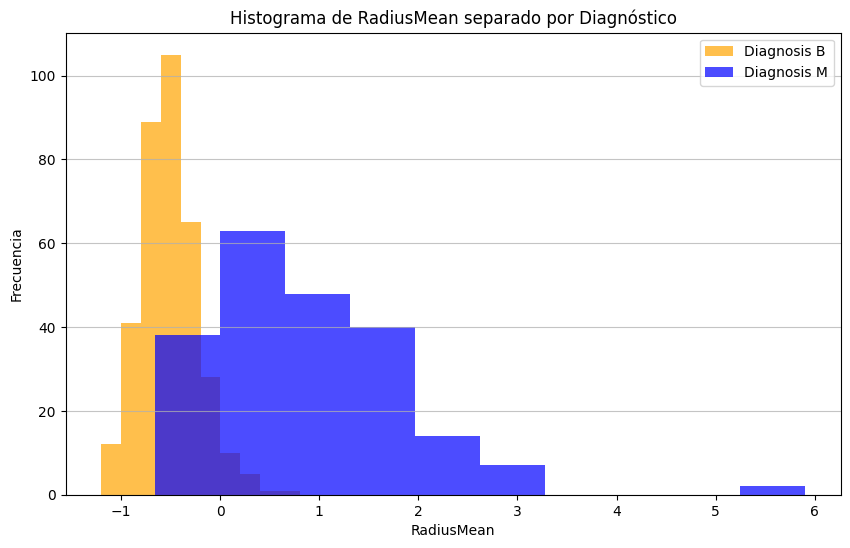

In [215]:
# Crear un histograma separado por las etiquetas B y M
plt.figure(figsize=(10, 6))

# Histograma para el diagnóstico B
plt.hist(cols_normalizadas[y['Diagnosis'] == 'B']['MeanRadius'],
         bins=10, color='orange', alpha=0.7, label='Diagnosis B')

# Histograma para el diagnóstico M
plt.hist(cols_normalizadas[y['Diagnosis'] == 'M']['MeanRadius'],
         bins=10, color='blue', alpha=0.7, label='Diagnosis M')

# Personalizar el gráfico
plt.title('Histograma de RadiusMean separado por Diagnóstico')
plt.xlabel('RadiusMean')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.show()

## 11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

In [216]:
pip install seaborn matplotlib

In [217]:
#construyamos un dataframe con las columnas requeridas
cols = {
    'RadiusMean': cols_normalizadas['MeanRadius'],
    'TextureMean': cols_normalizadas['MeanTexture'],
    'PerimeterMean': cols_normalizadas['PerimeterMean'],
    'AreaMean': cols_normalizadas['AreaMean1'],
    'SmoothnessMean': cols_normalizadas['SmoothnessMean'],
    'CompactnessMean': cols_normalizadas['CompactnessMean'],
    'ConcavityMean': cols_normalizadas['ConcavityMean'],
    'ConcavePointsMean': cols_normalizadas['ConcavePointsMean'],
    'Symmetry3': cols_normalizadas['Symmetry3'],
    'FractalDimension3': cols_normalizadas['FractalDimension2'],
    'Targets': y['Diagnosis']
}
df = pd.DataFrame (cols)
df

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,Symmetry3,FractalDimension3,Targets
0,2.186288,-0.961433,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.748204,0.906286,M
1,1.151578,-0.622176,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.243675,-0.099356,M
2,1.369068,-0.401675,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,1.151242,0.293301,M
3,0.022435,0.011777,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,6.040726,2.045711,M
4,1.283430,-1.127515,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.867590,0.498889,M
...,...,...,...,...,...,...,...,...,...,...,...
564,2.339574,0.094280,2.062496,2.319074,0.834796,0.045809,1.091639,2.004001,-1.358963,0.167832,M
565,1.417363,2.152275,1.397014,1.502133,-0.337297,-0.160662,0.393593,0.934487,-0.531387,-0.490124,M
566,0.372799,0.558250,0.509009,0.395171,-0.675876,0.324159,0.294468,0.377003,-1.103578,0.036694,M
567,1.558216,1.460722,1.906541,1.464675,0.926916,3.062208,2.596660,1.909844,1.917396,0.903262,M


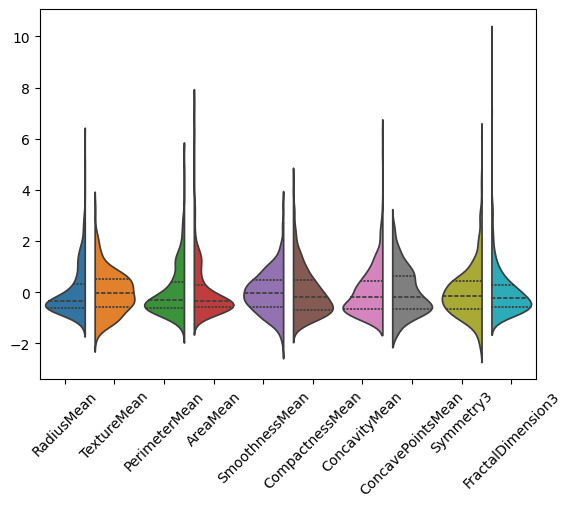

In [218]:
# Reorganizar los datos para crear un formato largo adecuado para seaborn violinplot
data = pd.melt(df, id_vars=None, var_name="features", value_name="value")

# Crear el gráfico de violín
sns.violinplot(x=None, y=None, hue=None, data=df, split=True, inner="quart")

# Rotar etiquetas del eje x para mejor visibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [219]:
data

,features,value
0,RadiusMean,2.186288
1,RadiusMean,1.151578
2,RadiusMean,1.369068
3,RadiusMean,0.022435
4,RadiusMean,1.28343
...,...,...
6254,Targets,M
6255,Targets,M
6256,Targets,M
6257,Targets,M


## 12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



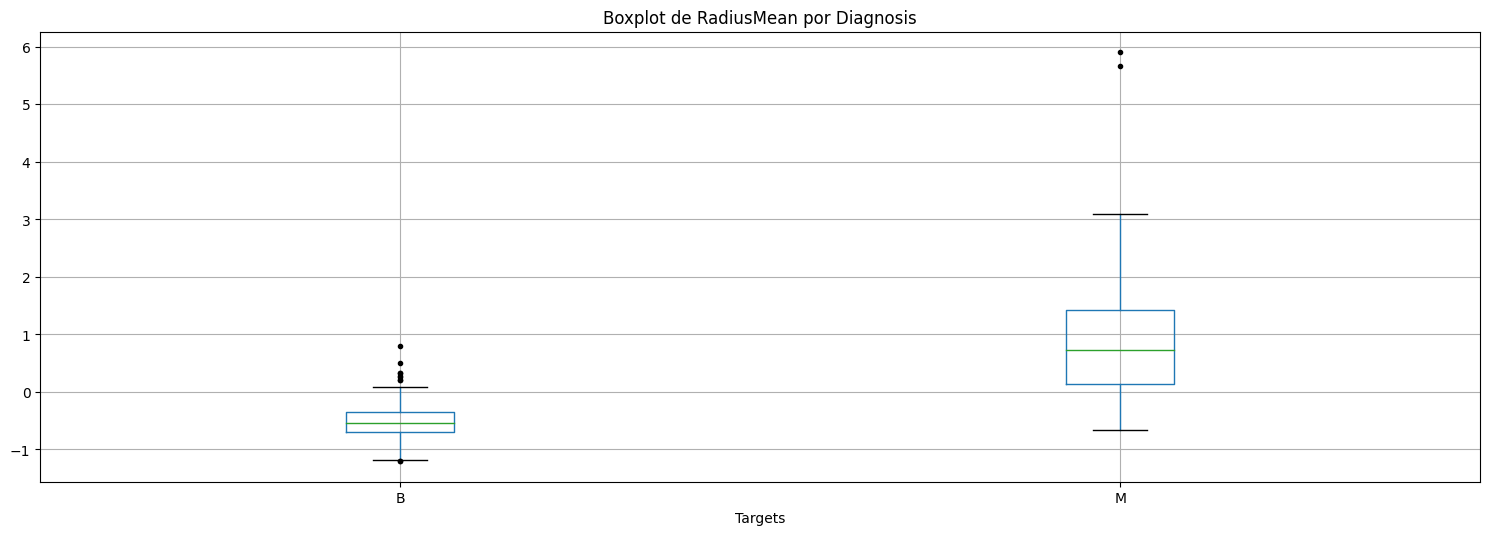

Número de filas antes de eliminar outliers: 569
Número de filas después de eliminar outliers: 536


In [220]:
# Crear un gráfico tipo boxplot para visualizar los outliers en la columna "RadiusMean"
df.boxplot(column="RadiusMean", by='Targets', sym='k.', figsize=(18,6))
plt.title('Boxplot de RadiusMean por Diagnosis')
plt.suptitle('')  # Eliminar el título superpuesto
plt.show()

# Calcular el rango intercuartílico (IQR)
Q1 = df['RadiusMean'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['RadiusMean'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores fuera de este rango
df_clean = df[~((df['RadiusMean'] < lower_bound) | (df['RadiusMean'] > upper_bound))]

print(f"Número de filas antes de eliminar outliers: {df.shape[0]}")
print(f"Número de filas después de eliminar outliers: {df_clean.shape[0]}")


In [221]:
df_clean

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,Symmetry3,FractalDimension3,Targets
1,1.151578,-0.622176,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.243675,-0.099356,M
2,1.369068,-0.401675,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,1.151242,0.293301,M
3,0.022435,0.011777,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,6.040726,2.045711,M
4,1.283430,-1.127515,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.867590,0.498889,M
5,-0.210099,-0.452851,-0.274246,-0.346105,1.479459,1.136165,0.762519,0.553320,1.752527,0.486418,M
...,...,...,...,...,...,...,...,...,...,...,...
562,-0.131991,1.381386,0.286378,-0.050715,0.068043,2.224683,2.589868,1.234748,1.920629,0.887012,M
565,1.417363,2.152275,1.397014,1.502133,-0.337297,-0.160662,0.393593,0.934487,-0.531387,-0.490124,M
566,0.372799,0.558250,0.509009,0.395171,-0.675876,0.324159,0.294468,0.377003,-1.103578,0.036694,M
567,1.558216,1.460722,1.906541,1.464675,0.926916,3.062208,2.596660,1.909844,1.917396,0.903262,M


In [222]:
len(df_clean)

536

In [223]:
len(df)

569

## 13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.



In [224]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

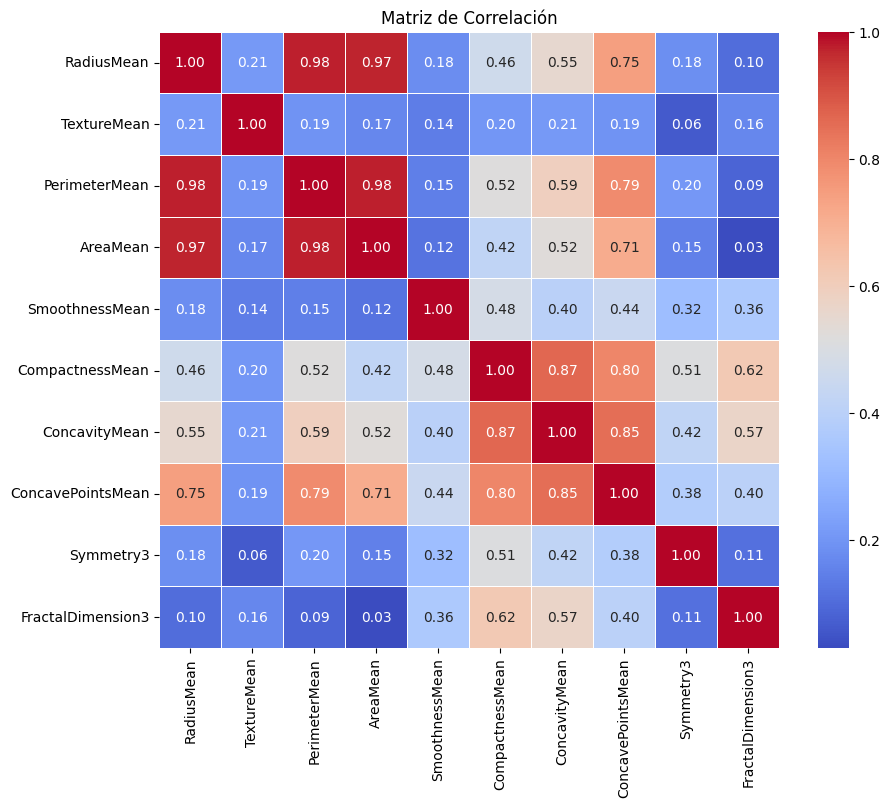

In [225]:
# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Crear el heatmap con seaborn
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()


## 14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?


<Axes: xlabel='RadiusMean', ylabel='TextureMean'>

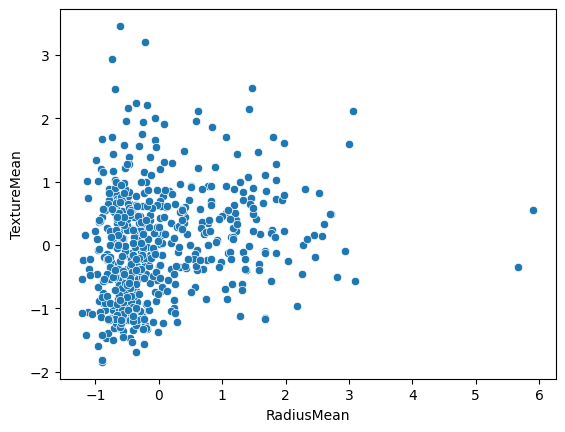

In [226]:
#Gráficos de dispersión
sns.scatterplot(x='RadiusMean', y='TextureMean', data=df)


<Axes: xlabel='RadiusMean', ylabel='Count'>

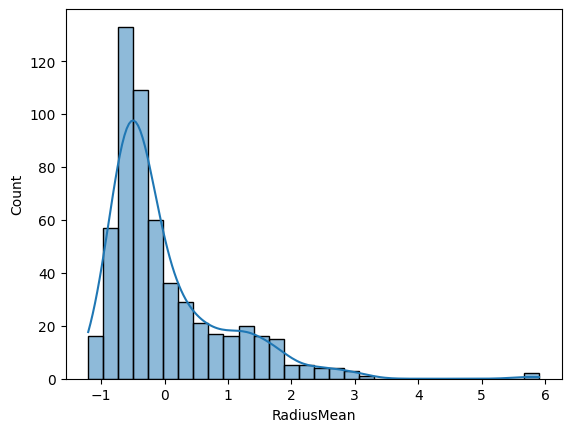

In [227]:
#Histogramas
sns.histplot(df['RadiusMean'], bins=30, kde=True)

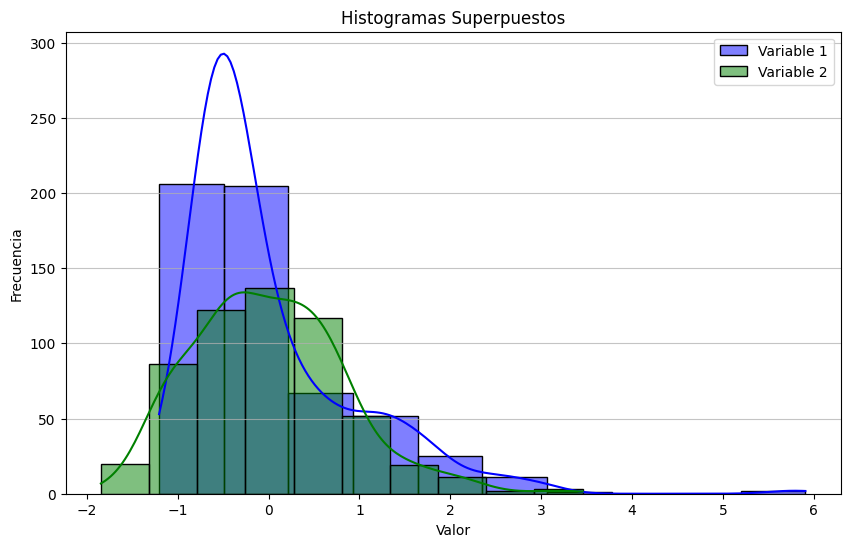

In [228]:
# Crear el gráfico de histogramas superpuestos
plt.figure(figsize=(10, 6))
sns.histplot(df['RadiusMean'], bins=10, color='blue', alpha=0.5, label='Variable 1', kde=True)
sns.histplot(df['TextureMean'], bins=10, color='green', alpha=0.5, label='Variable 2', kde=True)

# Personalizar el gráfico
plt.title('Histogramas Superpuestos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)

# Mostrar el gráfico
plt.show()

In [229]:
## Gráficos de caja
## Gráficos de barras
## Gráficos de violín
## Pair Plots
## Gráficos de líneas
## Gráficos de área
## Gráficos de burbujas
## Gráficos de radar